In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [5]:
X , y = make_blobs(centers=4 , random_state=23 , cluster_std=3)
#center--no of cluster
#cluster_std -- distance between datapoints in cluster

In [9]:
db = DBSCAN(eps=2 , min_samples=5)
db.fit(X)

DBSCAN(eps=2)

In [10]:
db.core_sample_indices_

array([ 1,  5,  6,  7, 11, 12, 13, 14, 18, 20, 23, 27, 28, 39, 44, 45, 53,
       58, 60, 63, 64, 65, 66, 68, 69, 70, 73, 74, 75, 76, 77, 78, 79, 80,
       82, 83, 84, 89, 90, 94, 95, 97, 98, 99], dtype=int64)

In [11]:
db.labels_
#labels -- clusters name

array([-1,  0,  0, -1, -1,  0,  1,  1,  2,  2,  0,  2,  0,  1,  1, -1, -1,
       -1,  0, -1,  0, -1, -1,  0, -1, -1, -1,  0,  3, -1, -1,  1, -1, -1,
       -1, -1, -1,  2,  0,  0, -1,  0, -1, -1,  0,  3,  3,  1, -1, -1,  0,
        0, -1,  3, -1, -1, -1,  0,  0, -1,  2, -1, -1,  1,  3,  0,  1, -1,
        0,  0,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  1,  1,  3,  0, -1,  2,  0,  0, -1,  0,  0,  0],
      dtype=int64)

In [12]:
set(db.labels_)
#0,1,2,3 --- clusters name
#-1 --- noisy (The cluster fails to radius and min samp conditions DBCAN gives that as -1)

{-1, 0, 1, 2, 3}

<Axes: >

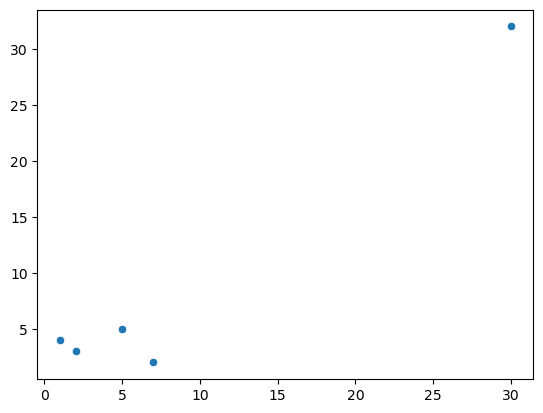

In [13]:
#How noisy can be

data = np.array([[1,4] , [2,3] , [5,5] , [7,2] , [30,32]])
sns.scatterplot(x = data[:,0] , y = data[:,1])
#there is noisy point outliers

#The points falis to radius and min samp conditions DBCAN gives that as -1

In [16]:
data

array([[ 1,  4],
       [ 2,  3],
       [ 5,  5],
       [ 7,  2],
       [30, 32]])

In [21]:
db = DBSCAN(eps=2 , min_samples=2)
db.fit(data)

DBSCAN(eps=2, min_samples=2)

In [22]:
db.labels_
#-1 not satisfying conditions

array([ 0,  0, -1, -1, -1], dtype=int64)

**If the epsilon value(Radius) is increases Cluster is increases**  

### Finding Optimal Value of Epsilon

In [23]:
from sklearn.neighbors import NearestNeighbors

In [27]:
data = [[1,2,3],[4,5,1] , [7,8,9]]
neib = NearestNeighbors(n_neighbors=2)
neib.fit(data)

distance , indices = neib.kneighbors(data)
print("Distances : " ,distance)
print("Indices : " , indices)

Distances :  [[0.         4.69041576]
 [0.         4.69041576]
 [0.         9.05538514]]
Indices :  [[0 1]
 [1 0]
 [2 1]]


In [28]:
#Applyting to X
neib = NearestNeighbors(n_neighbors=2)
neib.fit(X)

distance , indices = neib.kneighbors(X)
print("Distances : " ,distance)
print("Indices : " , indices)

#Distances-->0. represent--- cluster number and other point 1.99 distance between perticular datapoint and centroid
#Indices---row numbers

Distances :  [[0.         1.99233793]
 [0.         1.47739798]
 [0.         1.33228141]
 [0.         3.8667991 ]
 [0.         0.95848851]
 [0.         1.07206152]
 [0.         0.69409194]
 [0.         0.69409194]
 [0.         0.39434336]
 [0.         1.31588705]
 [0.         0.40816567]
 [0.         0.57135999]
 [0.         0.75256209]
 [0.         0.54155407]
 [0.         0.8839591 ]
 [0.         4.81395002]
 [0.         3.83384724]
 [0.         0.8370782 ]
 [0.         1.05597055]
 [0.         0.92876915]
 [0.         0.86442439]
 [0.         0.95848851]
 [0.         0.92876915]
 [0.         0.66217818]
 [0.         0.8370782 ]
 [0.         0.87763067]
 [0.         3.06909944]
 [0.         0.66217818]
 [0.         0.5466186 ]
 [0.         1.67016081]
 [0.         2.35548001]
 [0.         0.53960922]
 [0.         1.30944561]
 [0.         1.08076548]
 [0.         2.08359539]
 [0.         1.08076548]
 [0.         2.32348073]
 [0.         1.3614118 ]
 [0.         0.40816567]
 [0.        

In [31]:
dist = np.sort(distance[:,1] , axis=0)
dist

array([0.32134501, 0.32134501, 0.35252274, 0.35252274, 0.39434336,
       0.39434336, 0.40816567, 0.40816567, 0.44525196, 0.47966817,
       0.47966817, 0.50258358, 0.50258358, 0.53300274, 0.53960922,
       0.53960922, 0.54155407, 0.54155407, 0.5466186 , 0.5466186 ,
       0.5678309 , 0.57135999, 0.60832614, 0.66217818, 0.66217818,
       0.68700892, 0.68810528, 0.6907701 , 0.69409194, 0.69409194,
       0.722339  , 0.722339  , 0.72443756, 0.75110721, 0.75110721,
       0.75256209, 0.8370782 , 0.8370782 , 0.86442439, 0.86442439,
       0.87763067, 0.87763067, 0.87798074, 0.87798074, 0.8839591 ,
       0.91429607, 0.92477194, 0.92876915, 0.92876915, 0.95848851,
       0.95848851, 0.97628377, 0.99332914, 0.99332914, 1.05597055,
       1.07206152, 1.07624702, 1.08076548, 1.08076548, 1.08942979,
       1.14037502, 1.15949905, 1.20748836, 1.23193506, 1.24215983,
       1.24418537, 1.24720243, 1.24720243, 1.28986398, 1.28986398,
       1.29879515, 1.29879515, 1.30944561, 1.30944561, 1.31588

In [32]:
import matplotlib.pyplot as plt

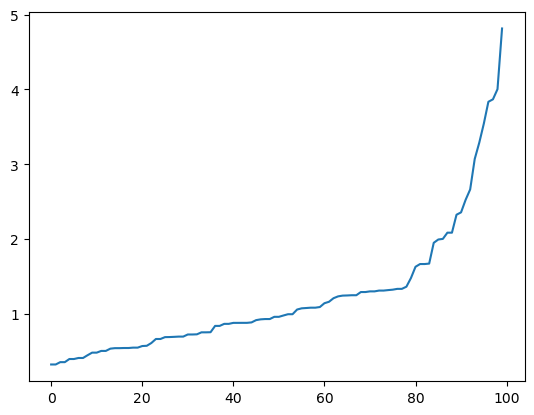

In [33]:
plt.plot(dist)

**1.5 is the optimal value for epsilon becz its hypering there**

In [38]:
db = DBSCAN(eps=1.5 , min_samples=5)
db.fit(X)

metrics.silhouette_score(X , db.labels_)

-0.15815863641846417